<a href="https://colab.research.google.com/github/sufairahmed/ML_IBM_COURSERA/blob/main/non_linera_regression_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

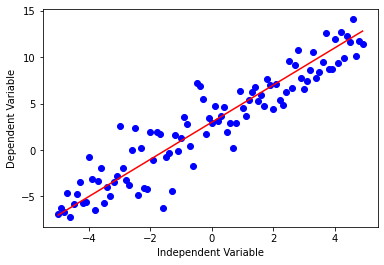

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

#you can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))
plt.plot(x,ydata, 'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

## Non-linear Regression

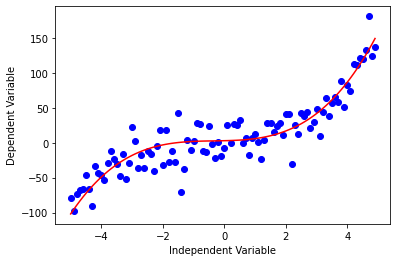

In [11]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20* np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Quadratic

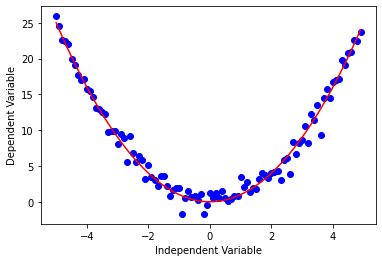

In [13]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Exponential

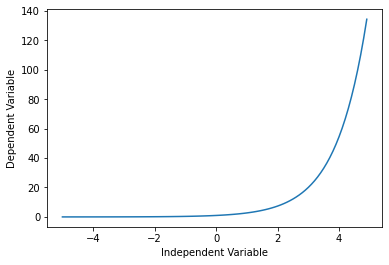

In [14]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)

plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Logarithmic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


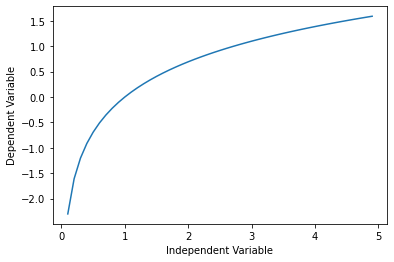

In [15]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

#Sigmoidal/Logistic

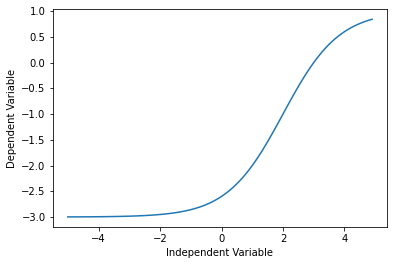

In [16]:
X = np.arange(-5.0, 5.0,0.1)
 
Y = 1-4/(1+np.power(3,X-2))

plt.plot(X,Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Non Linear Regression Example

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('china_gdp.csv')
dataset.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


##Ploting the Dataset

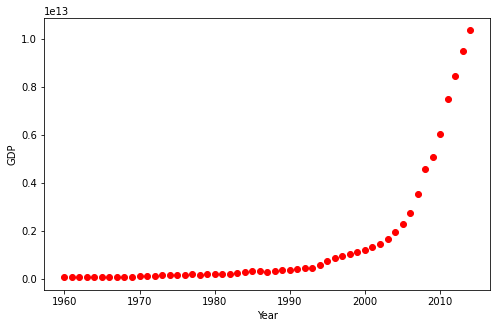

In [21]:
plt.figure(figsize=(8,5))
x_data, y_data = (dataset['Year'].values, dataset['Value'].values)

plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## Choosing a Model